In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [27]:
# Calculate the average ratio of experimental mice to control mice
#ratios = pd.read_excel(r'C:\Users\sarge\Documents\Boyle et al 2023_obesity paper\analysis\EXP02_CeA_ManipulationMice_MAIN_SAMPLES_FFA_acylcarnitines_FFA_Tissue_Plasma_09012023.xlsx', sheet_name="Average_Ratios_Tissue")
ratios = pd.read_excel(r'C:\Users\sarge\Documents\Boyle et al 2023_obesity paper\analysis\EXP02_CeA_ManipulationMice_MAIN_SAMPLES_FFA_acylcarnitines_FFA_Tissue_Plasma_09012023.xlsx', sheet_name="Avg_Ratios_Plasma")
# Calculate p value by running a t test on the original values, exp vs control.
#pValues = pd.read_excel(r'C:\Users\sarge\Documents\Boyle et al 2023_obesity paper\analysis\EXP02_CeA_ManipulationMice_MAIN_SAMPLES_FFA_acylcarnitines_FFA_Tissue_Plasma_09012023.xlsx', sheet_name="T_Tests_OG_Values_Tissue")
pValues = pd.read_excel(r'C:\Users\sarge\Documents\Boyle et al 2023_obesity paper\analysis\EXP02_CeA_ManipulationMice_MAIN_SAMPLES_FFA_acylcarnitines_FFA_Tissue_Plasma_09012023.xlsx', sheet_name="T_Tests_Plasma")

In [28]:
pValues.head()

,Unnamed: 0,TeLC Plasma Pre-HFD,NaCh Plasma Pre-HFD,TeLC Plasma Post-HFD,NaCh Plasma Post-HFD,TeLC Cardiac Plasma,NaCh Cardiac Plasma
0,(C12) lauric acid,0.500466,0.155930,0.775012,0.429535,0.682476,0.595385
1,(C14) myristic acid,0.458275,0.089876,0.363251,0.599905,0.374797,0.488674
2,(C16) palmitic acid,0.312067,0.603051,0.404736,0.632493,0.480386,0.503768
3,(C18) stearic acid,0.220098,0.483555,0.457262,0.273657,0.292315,0.427504
4,(C20) arachidic acid,0.470389,0.016263,0.591332,0.309457,0.394545,0.466849


In [29]:
old_names = ratios.columns.to_list()
old_names[0] = 'Molecule Name'
ratios.columns = old_names
pValues.columns = old_names
ratios.reset_index(drop=True)
pValues.reset_index(drop=True)
#ratios.drop(ratios.columns[0], axis=1)
ratios.set_index('Molecule Name', inplace=True)
pValues.set_index('Molecule Name', inplace=True)
ratios.head()

,TeLC Plasma Pre-HFD,NaCh Plasma Pre-HFD,TeLC Plasma Post-HFD,NaCh Plasma Post-HFD,TeLC Cardiac Plasma,NaCh Cardiac Plasma
Molecule Name,,,,,,
(C12) lauric acid,1.131281,1.248390,0.947886,0.887228,0.878701,0.899221
(C14) myristic acid,1.380589,1.552995,1.202334,0.907201,0.758832,0.840836
(C16) palmitic acid,1.373008,1.126945,1.139537,0.924054,0.887681,0.893857
(C18) stearic acid,1.987990,1.164986,0.878894,0.891539,0.843943,0.886901
(C20) arachidic acid,1.570570,1.818169,1.144892,0.853719,1.303730,0.870168


## Plot the data as a heatmap

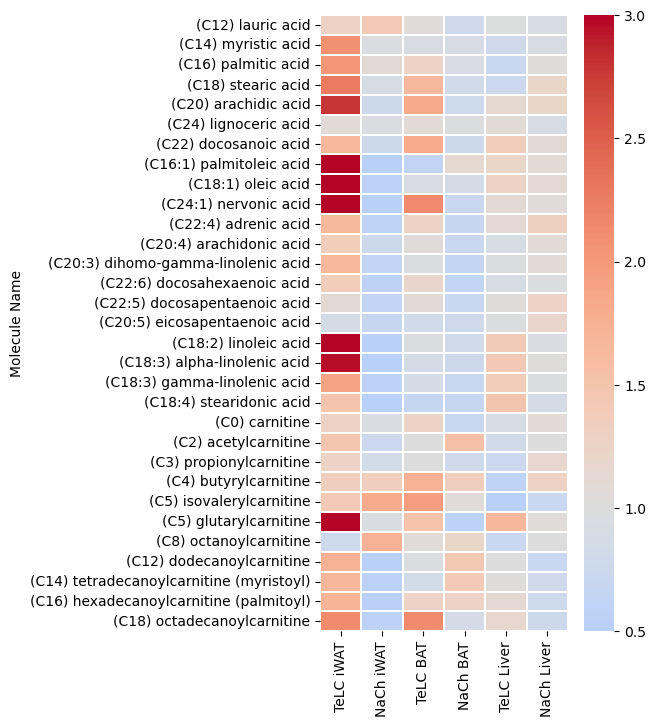

In [25]:
plt.subplots(figsize=(4, 8))
cmap = sns.diverging_palette(220, 10, s=150, l=50, as_cmap=True)
ax = sns.heatmap(data=ratios, square=False, linewidths=.3, cmap="coolwarm", vmin=0.5, vmax=3, center=1)

## Try grouping by fatty acid type

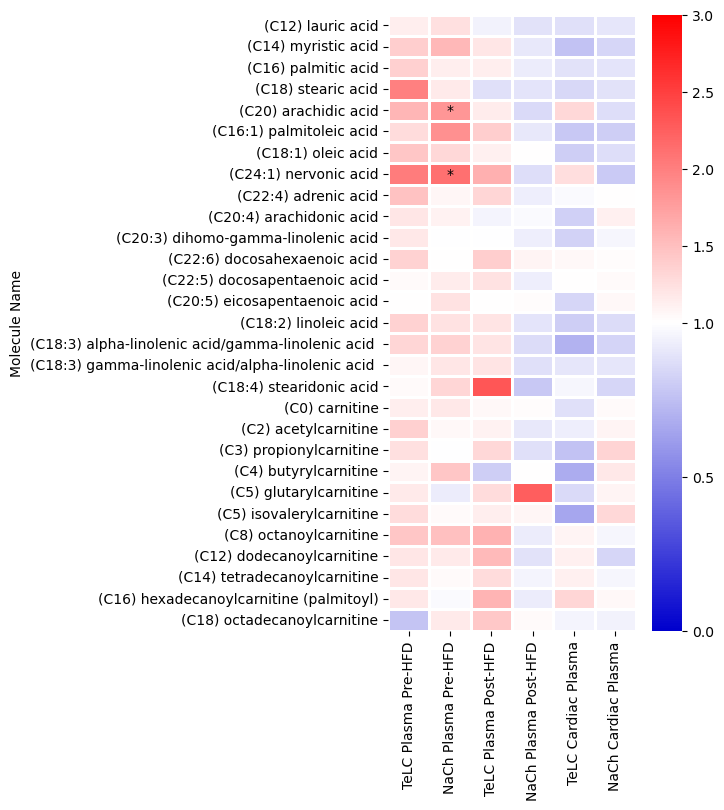

In [30]:
# Create custom colormap
colors = [(0, 'mediumblue'), (0.5, 'white'), (1, 'red')]
cmap_custom = LinearSegmentedColormap.from_list('custom_colormap', colors, N=256)

# Normalize the colormap to match the required value range
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=0, vcenter=1, vmax=3)

# Heatmap
fig, ax = plt.subplots(figsize=(4, 8))
sns.heatmap(data=ratios, square=False, linewidths=1, cmap=cmap_custom, norm=norm, vmin=0, vmax=3, ax=ax)

# Add text annotations for statistically significant cells
for i in range(pValues.shape[0]):
    for j in range(pValues.shape[1]):
        if pValues.iloc[i, j] < 0.05:  # Adjust the threshold as needed
            ax.text(j + 0.5, i + 0.5, '*', color='black',
                    ha='center', va='center', fontweight='regular')

plt.savefig("Plasma 0.05 Significance.svg", format="svg")

In [15]:
#saturated = ['palmitic acid (D31)', '(C12) lauric acid', '(C14) myristic acid', '(C16) palmitic acid', '(C18) stearic acid', '(C20) arachidic acid', '(C24) lignoceric acid', '(C22) docosanoic acid']
#monounsaturated = ['(C16:1) palmitoleic acid', '(C18:1) oleic acid', '(C24:1) nervonic acid']
#polyunsaturated = ['(C22:4) adrenic acid', '(C20:4) arachidonic acid', '(C20:3) dihomo-gamma-linolenic acid', '(C22:6) docosahexaenoic acid', '(C22:5) docosapentaenoic acid', '(C20:5) eicosapentaenoic acid', '(C18:2) linoleic acid', '(C18:3) alpha-linolenic acid', '(C18:3) gamma-linolenic acid', '(C18:4) stearidonic acid']
plt.savefig("Fatty Acids.svg", format="svg")


In [16]:
ordered_ratios = ratios.loc[saturated + monounsaturated + polyunsaturated, :]

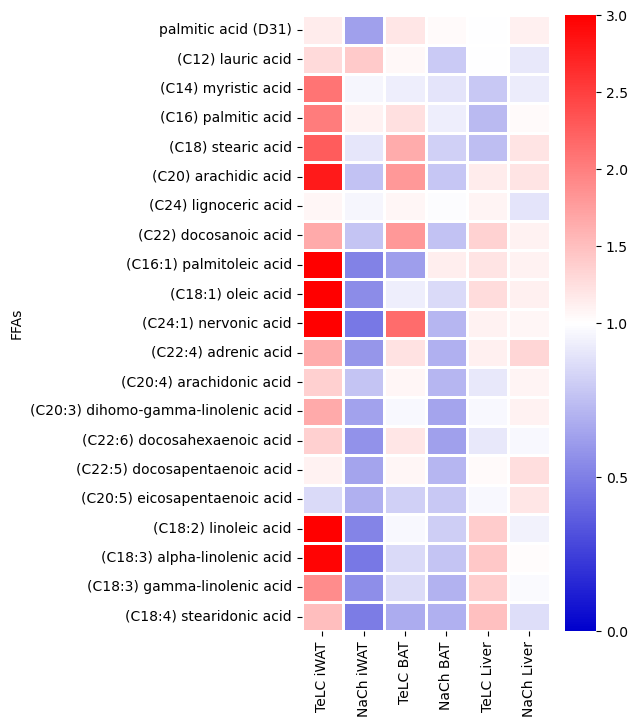

In [17]:
# Heatmap saturated
fig, ax = plt.subplots(figsize=(4, 8))
sns.heatmap(data=ordered_ratios, square=False, linewidths=1, cmap=cmap_custom, norm=norm, vmin=0, vmax=3, ax=ax)

plt.savefig("Fatty Acids.svg", format="svg")